In [118]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

import wrangle, env

In [119]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=14)

In [120]:
# Load the prepared dataset

access_log = wrangle.wrangle_curriculum_access_log()

# Print the shape
print(access_log.shape)

# Take a peek at the dataset
access_log.head()

(719459, 8)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson
timestamp,,,,,,,,
2018-01-26 09:55:03,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,homepage
2018-01-26 09:56:02,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii
2018-01-26 09:56:05,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii
2018-01-26 09:56:06,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,slides
2018-01-26 09:56:24,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0,javascript-i


In [121]:
# Quick summarize the dataset
access_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     719459 non-null  int64         
 1   cohort_id   719459 non-null  float64       
 2   ip          719459 non-null  object        
 3   name        719459 non-null  object        
 4   start_date  719459 non-null  datetime64[ns]
 5   end_date    719459 non-null  datetime64[ns]
 6   program_id  719459 non-null  float64       
 7   lesson      719459 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 49.4+ MB


### Q1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?
### Data Science Program

In [122]:
# Create the mask for ds program
mask_ds = (access_log.program_id == 3)

# Create the dataframe for ds program
log_ds = access_log[mask_ds]

# Print the shape
print(log_ds.shape)

# Take a peek at the new df
log_ds.head()

(68017, 8)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson
timestamp,,,,,,,,
2019-08-20 09:39:58,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage
2019-08-20 09:39:59,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage
2019-08-20 09:39:59,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage
2019-08-20 09:40:02,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage
2019-08-20 09:40:08,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage


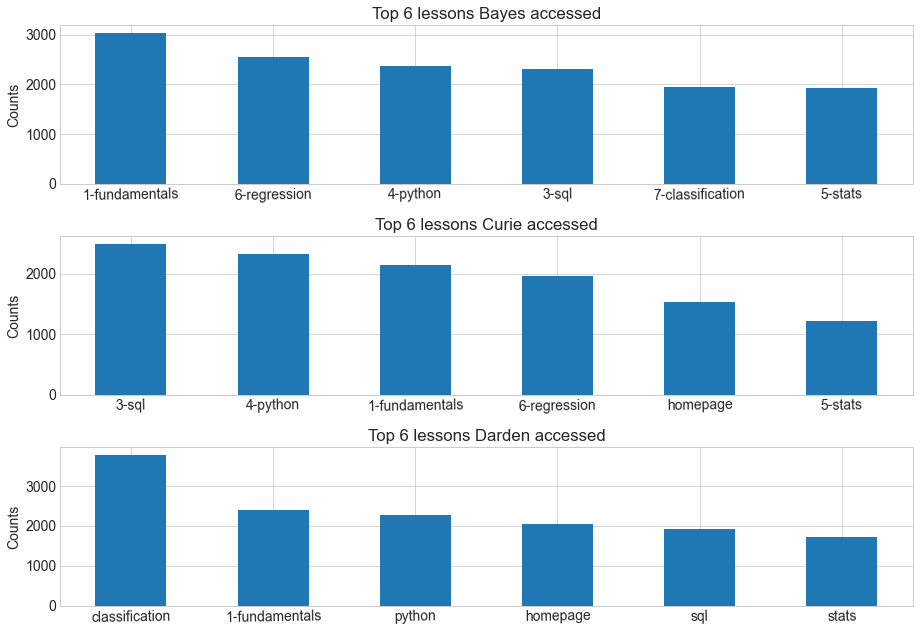

In [127]:
# Create fig and ax objects
fig, axes = plt.subplots(3, 1, figsize=(13,9))

# For Loop to barplot the top 6 lessons each cohort accessed

for ax, (name, subset) in zip(axes, log_ds.groupby('name')):
    subset.lesson.value_counts(ascending=False).head(6).plot(kind='bar', rot=1, ax=ax)
    ax.set_title(f'Top 6 lessons {name} accessed')
    ax.set_ylabel('Counts')

plt.tight_layout()

**Takeaways**
- Although homepage has a lot of hits, it does not count as the lesson, because the users use it as the table of contents to find what they really want. 
- For data science programs, the most attractive lessons across cohorts are (baded on their order in curriculum): fundamentals, sql, python, stats, classification and regression.

### Web Development
- I will focused on the most recent three cohorts available: 58, 61, 62, because 1). most recent data matter the most and 2). there will be too many plots if I show all the cohorts. It is better to use Tableau for that kind of work. 

In [124]:
# Create the mask for wd program
mask_recent_wd = (access_log.cohort_id == 58) | (access_log.cohort_id == 61) | (access_log.cohort_id == 62)

# Create the dataframe for ds program
log_recent_wd = access_log[mask_recent_wd]

# Print the shape
print(log_recent_wd.shape)

# Take a peek at the new df
log_recent_wd.head()

(48846, 8)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson
timestamp,,,,,,,,
2020-05-26 16:21:50,655,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0,homepage
2020-05-26 17:03:59,655,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0,toc
2020-05-26 17:04:28,655,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0,html-css
2020-05-27 00:31:09,655,58.0,162.194.247.205,Hyperion,2020-05-26,2020-11-10,2.0,homepage
2020-05-27 00:31:24,655,58.0,162.194.247.205,Hyperion,2020-05-26,2020-11-10,2.0,homepage


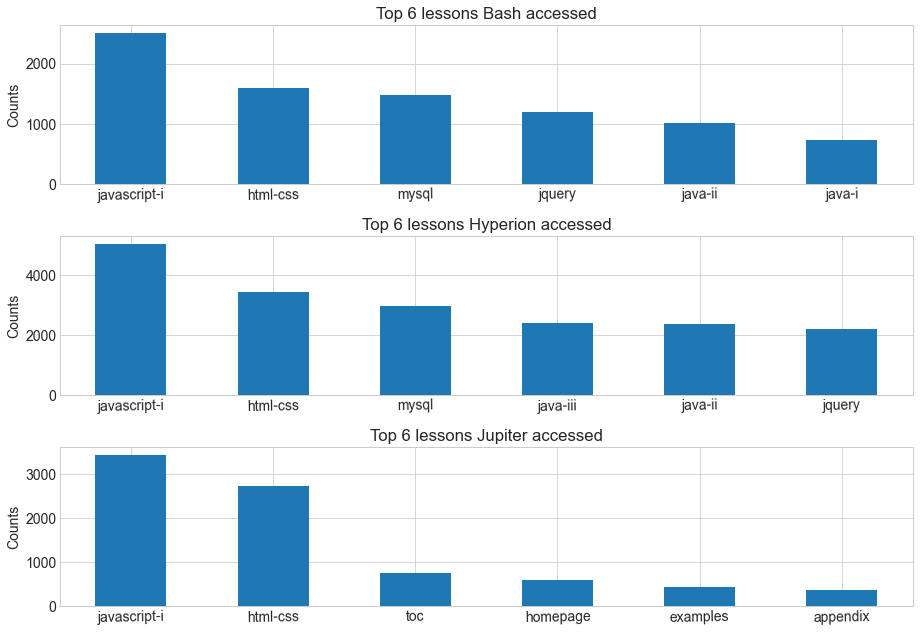

In [128]:
# Create fig and ax objects
fig, axes = plt.subplots(3, 1, figsize=(13,9))

# For Loop to barplot the top 6 lessons each cohort accessed

for ax, (name, subset) in zip(axes, log_recent_wd.groupby('name')):
    subset.lesson.value_counts(ascending=False).head(6).plot(kind='bar', rot=1, ax=ax)
    ax.set_title(f'Top 6 lessons {name} accessed')
    ax.set_ylabel('Counts')

plt.tight_layout()

**Takeaways**
- For web development programs, the most attractive lessons across the most recent 3 cohorts: javascript-i, html-css, mysql and jquery.

### Q2: Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 

### Data Science Program

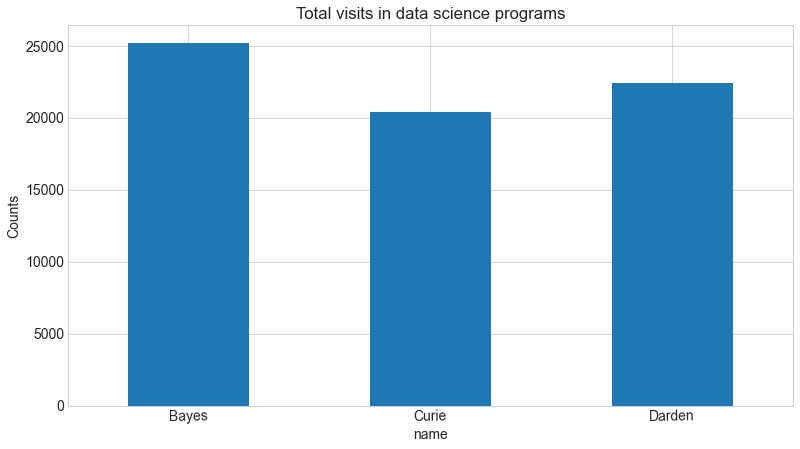

In [129]:
# Plot the total visits based on cohorts

log_ds.groupby('name').lesson.size().plot(kind='bar', rot=1)
plt.title('Total visits in data science programs')
plt.ylabel('Counts')
plt.show()

In [130]:
# Drop the missing values

log_ds_lesson.dropna(axis=0, inplace=True)

# Print the shape
print(log_ds_lesson.shape)

log_ds_lesson

(28, 3)


name,Bayes,Curie,Darden
lesson,,,
1-fundamentals,3044.0,2148.0,2385.0
10-anomaly-detection,1197.0,928.0,28.0
11-nlp,1102.0,735.0,1.0
12-distributed-ml,620.0,375.0,1.0
13-advanced-topics,601.0,404.0,3.0
2-storytelling,804.0,683.0,126.0
3-sql,2307.0,2498.0,1351.0
4-python,2368.0,2326.0,134.0
5-stats,1918.0,1225.0,211.0


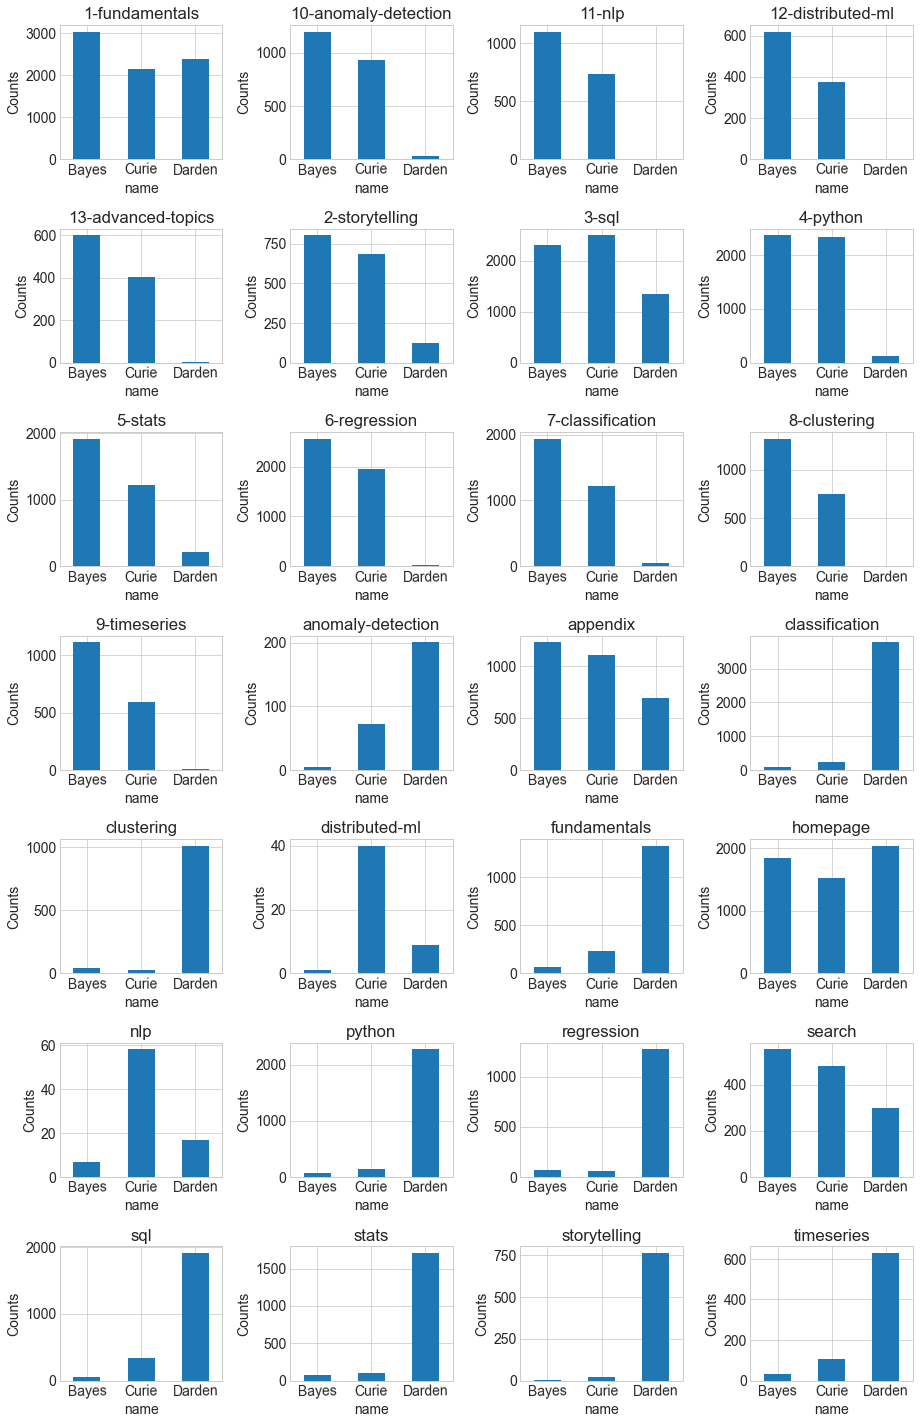

In [131]:
# Create a list of lessons
lessons = log_ds_lesson.index.to_list()

# Create the figures grids
fig, axes = plt.subplots(7, 4, figsize=(13, 20))

# Flatten axes to a 1D array
ax = axes.ravel()

for i, lesson in zip(range(28), lessons):
    log_ds_lesson.loc[lesson, :].plot(kind='bar', ax=ax[i], rot=1)
    ax[i].set_title(f'{lesson}')
    ax[i].set_ylabel('Counts')
    
plt.tight_layout()
plt.show()

**Takeaways**
- Needs further cleaning to combine the duplicates. For example, there are a sql chart and a 3-sql chart.
- Each cohort seems to have its unique patterns when referring to the lessons and we can call such pattern the “curriculum fingerprint”. In my futuer work, I will first make the lesson column cleaner and then use the pie chart or stacked barplot to represent such fingerprint. 
- So fart, the most obvious one is Darden hits timeseries lesson significantly more than the other two cohorts. 

### Web Development
- Using the same approach for Q1, I will focused on the most recent three cohorts: 58, 61, 62

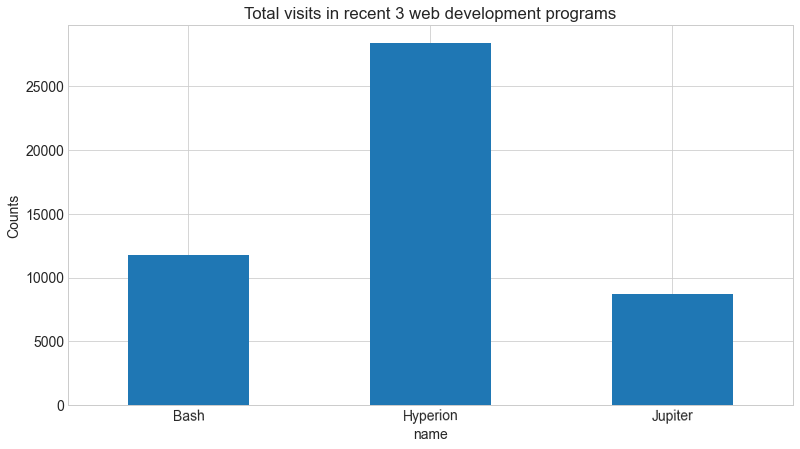

In [132]:
# Plot the total visits based on recent 3 cohorts

log_recent_wd.groupby('name').lesson.size().plot(kind='bar', rot=1)
plt.title('Total visits in recent 3 web development programs')
plt.ylabel('Counts')
plt.show()

In [133]:
# Create the dataframe 

log_recent_wd_lesson = log_recent_wd.groupby(['name', 'lesson']).user_id.count().unstack(0)

# Print the shape
print(log_recent_wd_lesson.shape)

log_recent_wd_lesson # I need to clean the dataframe

(71, 3)


name,Bash,Hyperion,Jupiter
lesson,,,
.well-known,NaN,2.0,NaN
advanced-topics,9.0,NaN,NaN
anomaly-detection,5.0,NaN,NaN
appendix,520.0,1216.0,361.0
asset-manifest.json,NaN,NaN,1.0
...,...,...,...
tools,NaN,1.0,NaN
user-input,NaN,3.0,NaN
users,11.0,NaN,NaN


In [134]:
# Drop the missing values

log_recent_wd_lesson.dropna(axis=0, inplace=True)

# Print the shape
print(log_recent_wd_lesson.shape)

log_recent_wd_lesson

(20, 3)


name,Bash,Hyperion,Jupiter
lesson,,,
appendix,520.0,1216.0,361.0
assets,1.0,1.0,4.0
capstone,50.0,326.0,22.0
examples,366.0,631.0,443.0
homepage,532.0,1245.0,600.0
html-css,1597.0,3427.0,2725.0
introduction,4.0,1.0,3.0
java-i,740.0,1552.0,35.0
java-ii,1013.0,2370.0,11.0


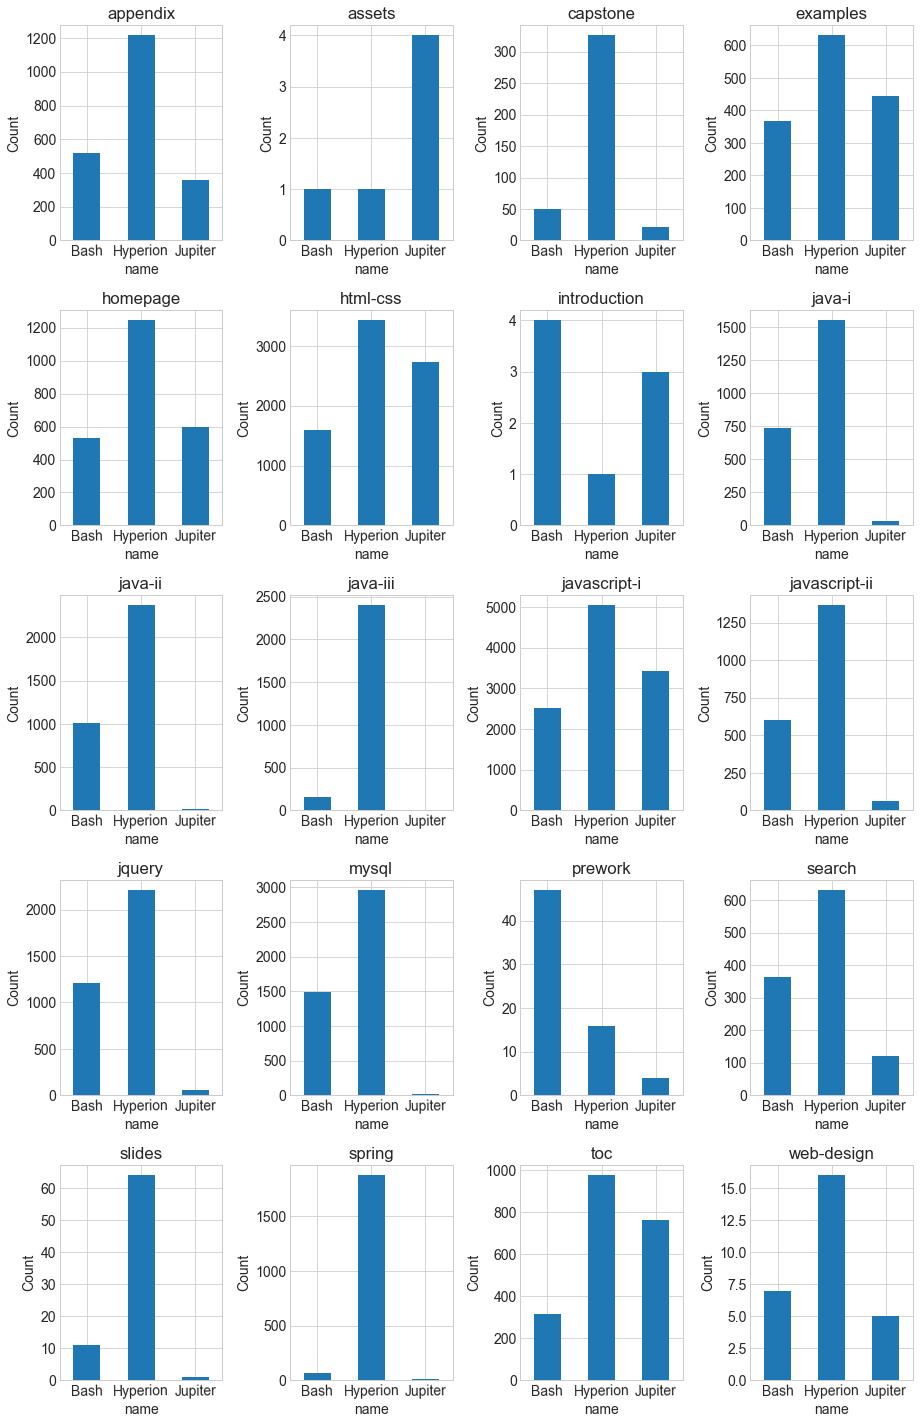

In [135]:
# Create a list of lessons
wd_lessons = log_recent_wd_lesson.index.to_list()

# Create the figures grids
fig, axes = plt.subplots(5, 4, figsize=(13, 20))

# Flatten axes to a 1D array
ax = axes.ravel()

for i, lesson in zip(range(28), wd_lessons):
    log_recent_wd_lesson.loc[lesson, :].plot(kind='bar', ax=ax[i], rot=1)
    ax[i].set_title(f'{lesson}')
    ax[i].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

**Takeaways**
- Duplicates are also found in the barplots, such as java-i and javascript-i, which indicates the column 'lesson' needs further clearning. 
- Hyperion has a significantly more hits than the other two at almost all the topics, because Hyperion start 2-4 months earlier than the other two.
- Although Jupiter starts two month later than Bash, it has a significantly more hits than Bash on the following lessons:
    - examples
    - html-css
    - javascript-i

### Q3: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 

In [136]:
# Create a empty list
user_id_hits = []

# For loop to compute the active hits for each user id

for user_id, subset in access_log.groupby('user_id'):
    active = subset.loc[(subset.index >= subset.start_date) & (subset.index <= subset.end_date)]
    active_hits = active.lesson.count()
    program = list(subset.program_id.value_counts().sort_values(ascending=False).index)
    if program == []:
        continue
    else:
        d = {'user_id': user_id, 'active_hits': active_hits, 'program_id': program[0]}
        user_id_hits.append(d)
    
# Take a peek at the list of the dictionaries
user_id_hits[:5]

[{'user_id': 1, 'active_hits': 0, 'program_id': 2.0},
 {'user_id': 2, 'active_hits': 1541, 'program_id': 2.0},
 {'user_id': 3, 'active_hits': 1514, 'program_id': 2.0},
 {'user_id': 4, 'active_hits': 692, 'program_id': 2.0},
 {'user_id': 5, 'active_hits': 1621, 'program_id': 2.0}]

In [137]:
# Turn the list of dictionaries into the dataframe
user_id_hits = pd.DataFrame(user_id_hits)

# Take a peek at the dataframe
user_id_hits.head()

,user_id,active_hits,program_id
0,1,0,2.0
1,2,1541,2.0
2,3,1514,2.0
3,4,692,2.0
4,5,1621,2.0


In [138]:
# Create a mask of active hits not 0
mask_active_hits = (user_id_hits.active_hits != 0) 

# Set the cutoff to be the bottom 10% of the active hits
cutoff = user_id_hits[mask_active_hits].active_hits.quantile(0.1)

# Print the cutoff
cutoff

114.4

In [139]:
# Pick the bottom 10% user id with the least active hits
user_id_hits_rare = user_id_hits[mask_active_hits].sort_values(by='active_hits').head(65)

# Print the shape
print(user_id_hits_rare.shape)

# Take a peek at the df
user_id_hits_rare.head()

(65, 3)


,user_id,active_hits,program_id
618,619,1,2.0
88,89,3,0.0
175,176,3,0.0
277,278,4,2.0
61,62,4,0.0


In [140]:
# Compute the count of the unique ids
user_id_hits_rare.user_id.nunique()

65

In [141]:
# Compute the relative frequency according to the program ids
user_id_hits_rare.program_id.value_counts(normalize=True)

2.0    0.584615
0.0    0.307692
3.0    0.107692
Name: program_id, dtype: float64

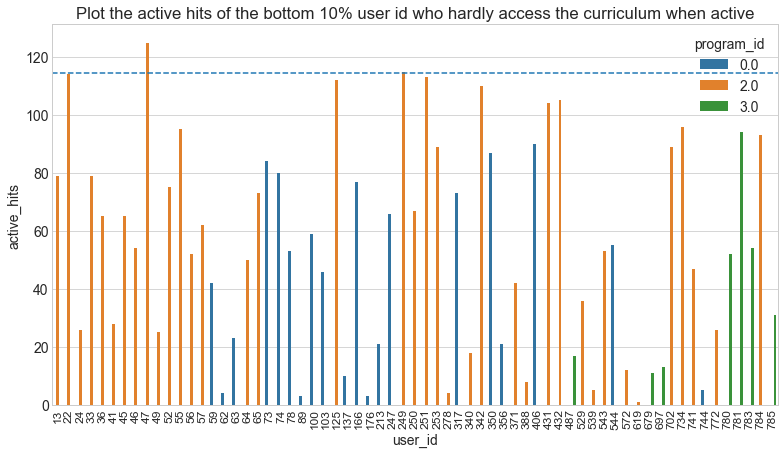

In [144]:
# Viz the bottom 10% user id based on program id. 

sns.barplot(data=user_id_hits_rare, x='user_id', y='active_hits', hue='program_id')
plt.xticks(rotation='vertical', fontsize=12)
plt.axhline(y=114.4, linestyle='dashed')
plt.title('Plot the active hits of the bottom 10% user id who hardly access the curriculum when active')
plt.show()

**Takeaways**
- Based on the active hits (defined as the access occurred when the students are active), the bottom 10% percentile belong to 65 user ids, of which 58% is from web development, 11% is from data science, and 31% is from user ids with no program ids. 

### Q4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 

### Data Science Program
#### Suspicious ip location

In [145]:
# Create a list to hold the unique ip addresses in data science programs
ips = list(log_ds.ip.value_counts().index)

# Print the dtype of ips element
print(type(ips[0]))

# Print the size of the ips
print(len(ips))

# Print the first element
ips[1]

<class 'str'>
594


'99.76.233.212'

In [ ]:
# Create the list 
ip_location = []

# Create a counter
# counter = 0

# Loop through all the ip addresses in ds program

for ip in ips:
    url = env.base_url + ip
    headers = {'x-rapidapi-key': env.rapidapi_key,  
               'x-rapidapi-host': env.host}
    response = requests.request('Get', url, headers=headers)
#     print(response.status_code) # Used to track the progress    
#     counter += 1
#     print(counter) # Used to track the progress
    data = response.json()
    ip_location.append(data)

In [14]:
# Print the size the list, should be 594
print(len(ip_location))

# Take a peek at the ip_location
ip_location[:2]

594


[{'ip': '97.105.19.58',
  'country_code': 'US',
  'country_name': 'United States',
  'region_code': 'TX',
  'region_name': 'Texas',
  'city': 'Fredericksburg',
  'zip_code': '78624',
  'time_zone': 'America/Chicago',
  'latitude': 30.2846,
  'longitude': -98.8781,
  'metro_code': 641},
 {'ip': '99.76.233.212',
  'country_code': 'US',
  'country_name': 'United States',
  'region_code': 'TX',
  'region_name': 'Texas',
  'city': 'San Antonio',
  'zip_code': '78230',
  'time_zone': 'America/Chicago',
  'latitude': 29.5443,
  'longitude': -98.5499,
  'metro_code': 641}]

In [23]:
# Conver the list of dicts to data frame

df_ip_location = pd.DataFrame(ip_location)
df_ip_location.head() # Saved as a .csv

,ip,country_code,country_name,region_code,region_name,city,zip_code,time_zone,latitude,longitude,metro_code
0,97.105.19.58,US,United States,TX,Texas,Fredericksburg,78624,America/Chicago,30.2846,-98.8781,641
1,99.76.233.212,US,United States,TX,Texas,San Antonio,78230,America/Chicago,29.5443,-98.5499,641
2,72.190.187.173,US,United States,TX,Texas,San Antonio,78254,America/Chicago,29.5584,-98.7435,641
3,72.181.127.233,US,United States,TX,Texas,San Antonio,78212,America/Chicago,29.4411,-98.4936,641
4,136.50.70.27,US,United States,TX,Texas,San Antonio,78249,America/Chicago,29.5652,-98.6146,641


In [28]:
# Print the shape of the data science access log
log_ds.shape, df_ip_location.shape

((68017, 9), (594, 11))

In [27]:
# Concat to the data science access log
log_ds_location = log_ds.merge(df_ip_location, how='inner', on='ip')

# Print the shape
print(log_ds_location.shape)

# Take a peek at the new dataframe
log_ds_location.head() # Saved as the .csv

(68017, 19)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson,sublesson,country_code,country_name,region_code,region_name,city,zip_code,time_zone,latitude,longitude,metro_code
0,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None,US,United States,TX,Texas,Fredericksburg,78624,America/Chicago,30.2846,-98.8781,641
1,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None,US,United States,TX,Texas,Fredericksburg,78624,America/Chicago,30.2846,-98.8781,641
2,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None,US,United States,TX,Texas,Fredericksburg,78624,America/Chicago,30.2846,-98.8781,641
3,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None,US,United States,TX,Texas,Fredericksburg,78624,America/Chicago,30.2846,-98.8781,641
4,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None,US,United States,TX,Texas,Fredericksburg,78624,America/Chicago,30.2846,-98.8781,641


In [146]:
log_ds_location = pd.read_csv('log_ds_location.csv', index_col=0)

In [147]:
# Quick Summarize the new dataframe
log_ds_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68017 entries, 0 to 68016
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       68017 non-null  int64  
 1   cohort_id     68017 non-null  float64
 2   ip            68017 non-null  object 
 3   name          68017 non-null  object 
 4   start_date    68017 non-null  object 
 5   end_date      68017 non-null  object 
 6   program_id    68017 non-null  float64
 7   lesson        68016 non-null  object 
 8   sublesson     62279 non-null  object 
 9   country_code  68017 non-null  object 
 10  country_name  68017 non-null  object 
 11  region_code   67938 non-null  object 
 12  region_name   67938 non-null  object 
 13  city          67923 non-null  object 
 14  zip_code      67921 non-null  object 
 15  time_zone     68017 non-null  object 
 16  latitude      68017 non-null  float64
 17  longitude     68017 non-null  float64
 18  metro_code    68017 non-nu

In [148]:
# Any access out of the United States?

mask_foreign = log_ds_location.country_code != 'US'
mask_foreign.sum() # 331 accesses are out of the US

331

In [149]:
# Create the dataframe for foreign access
log_ds_location_foreign = log_ds_location[mask_foreign]

# Print the shape
print(log_ds_location_foreign.shape)

# Where do the foreign ip address belong to? 
log_ds_location_foreign.country_name.value_counts()

(331, 19)


Canada       212
Mexico        43
Germany       41
Ireland       18
Australia     15
China          2
Name: country_name, dtype: int64

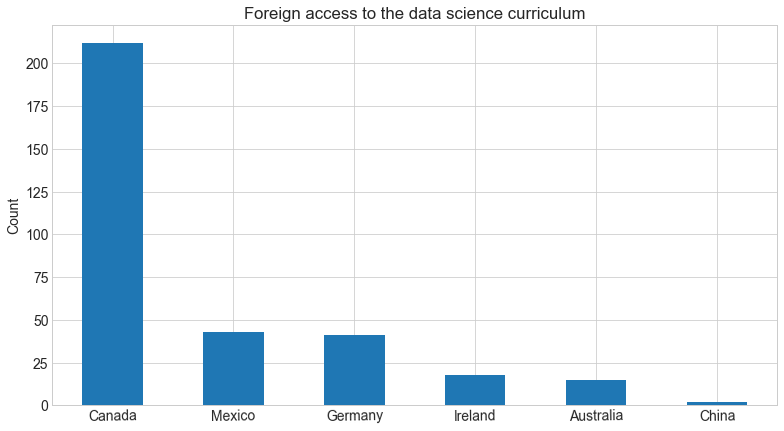

In [150]:
# Visualize the foreign access

log_ds_location_foreign.country_name.value_counts().plot(kind='bar', rot=1)
plt.title('Foreign access to the data science curriculum')
plt.ylabel('Count')
plt.show()

**Takeaways**
- There are 331 foreign accesses to the data science curriculum and most of them are from Cancada.
- For future work, I will analyze the suspicious ip address for the web development program.

### Q5: At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 

### Data Science Program

In [151]:
# Based on Q1, the key words in wd curriculum I am looking for in the data science access
# 'java', 'html', 'jquery', 'spring'

mask_ds_cross = log_ds.lesson.str.contains('java|html-css|jquery|spring')
mask_ds_cross.value_counts(dropna=False)

False    67947
True        70
Name: lesson, dtype: int64

In [152]:
# Replace the Nan with False

mask_ds_cross.fillna(True, inplace=True)
mask_ds_cross.value_counts(dropna=False)

False    67947
True        70
Name: lesson, dtype: int64

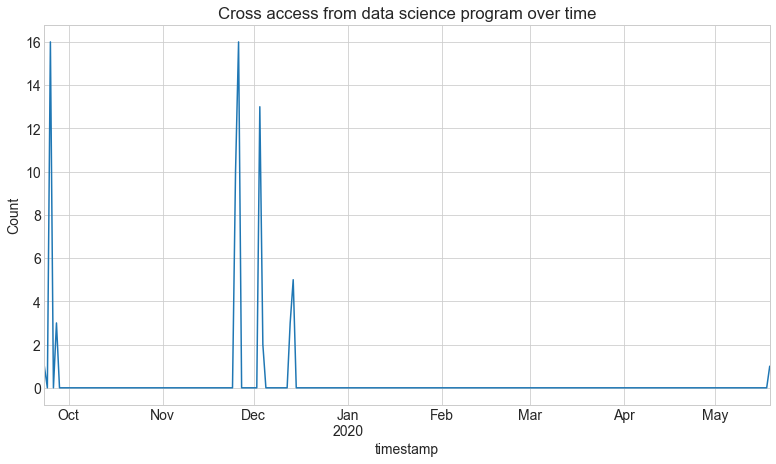

In [153]:
# Reample cross count by Day and plot over time

log_ds_cross = log_ds[mask_ds_cross]
log_ds_cross.resample('D').lesson.count().plot()
plt.title('Cross access from data science program over time')
plt.ylabel('Count')
plt.show()

### Web Development Program

In [154]:
# Create a mask for wd
mask_wd = (access_log.program_id != 3)

# Count how many access by wd
mask_wd.sum()

651442

In [155]:
# Create the dataframe for 
log_wd = access_log[mask_wd]

# Print the shape
log_wd.shape

(651442, 8)

In [156]:
# Based on Q1, the key words in wd curriculum I am looking for in the data science access
# 'fundamental', 'regression', 'python', 'stats', 'class'

mask_wd_cross = log_wd.lesson.str.contains('fundamental|regression|python|stats|classification')
mask_wd_cross.value_counts(dropna=False)

False    642288
True       9154
Name: lesson, dtype: int64

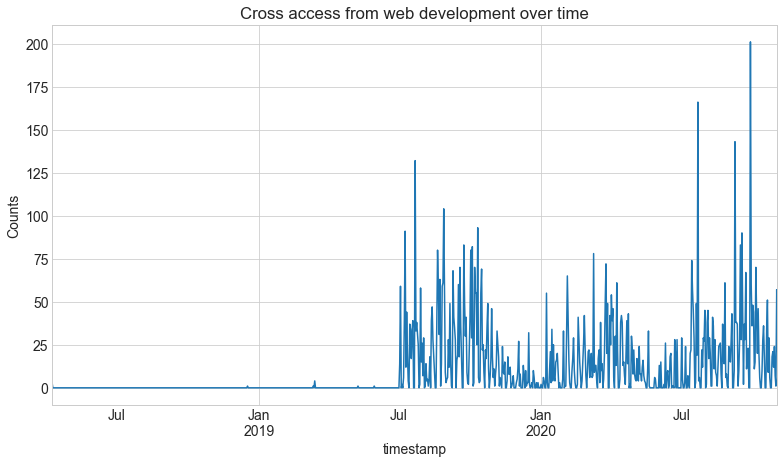

In [157]:
# Reample cross count by Day and plot over time

log_wd_cross = log_wd[mask_wd_cross]
log_wd_cross.resample('D').lesson.count().plot()
plt.title('Cross access from web development over time')
plt.ylabel('Counts')
plt.show()

### Compare Data Science and Web Development Cross Access

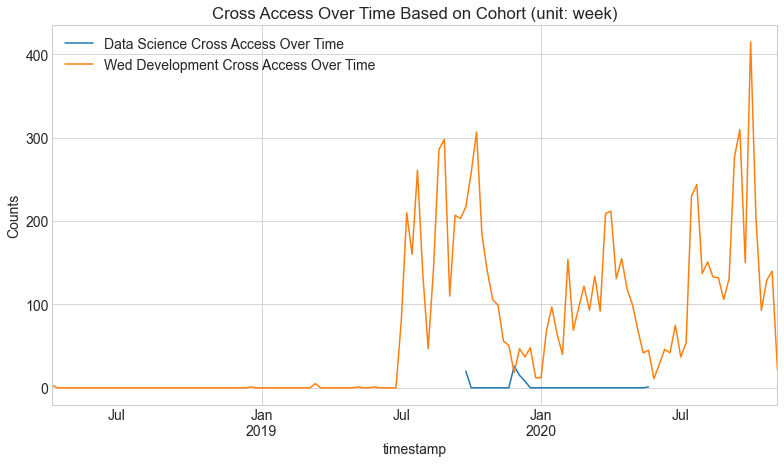

In [158]:
log_ds_cross.resample('W').lesson.count().plot(label='Data Science Cross Access Over Time')
log_wd_cross.resample('W').lesson.count().plot(label='Wed Development Cross Access Over Time')
plt.title('Cross Access Over Time Based on Cohort (unit: week)')
plt.ylabel('Counts')
plt.legend()
plt.show()

**Takeaways**
- Web development cross-access significantly more than data science. 
- Before July 2019, no cross-access is observed. 
- After July 2019, there are two windows the cross-access from web development significantly dropped:
    - nearly December 2019. It is expected because it is the holiday season.
    - nearly June 2020. It is unexpected so it may be another time when the cross-access has been shut down. 

### Q6: What topics are grads continuing to reference after graduation and into their jobs (for each program)? 

### Data Science Program

In [159]:
# Take a look at the log_ds
log_ds.head(1)

,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson
timestamp,,,,,,,,
2019-08-20 09:39:58,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage


In [160]:
# Create a list of cohort names for ds program
ds_corhorts = list(log_ds.name.unique())

# Create the empty dataframe
ds_post_hits = pd.DataFrame()

for i in ds_corhorts:
    
    # Create a mask for the cohort
    mask = (log_ds.name == i)

    # Create the dataframe for that cohort
    log_cohort = log_ds[mask]

    # Create the dataframe for post graduation
    log_post_grad = log_cohort.loc[log_cohort.index > log_cohort.end_date]

    # Group by lesson and count the hists
    post_lesson = log_post_grad.groupby('lesson').size().sort_index()
    
    # Conver to dataframe
    post_lesson = pd.DataFrame(post_lesson, columns=[i])
    
    # Concat to the empty dataframe
    ds_post_hits = pd.concat([ds_post_hits, post_lesson], axis=1)
    
# Fill the missing values with 0
ds_post_hits = ds_post_hits.fillna(0)

# Take a peek at the dataset
ds_post_hits.head()

,Bayes,Curie,Darden
1-fundamentals,329.0,56.0,0
10-anomaly-detection,129.0,44.0,0
11-nlp,121.0,12.0,0
12-distributed-ml,127.0,1.0,0
13-advanced-topics,60.0,7.0,0


In [161]:
# Create a new column of hits_post_grad
ds_post_hits['hits_post_grad'] = ds_post_hits.sum(axis=1)

# Take a look at the new df
ds_post_hits.head()

,Bayes,Curie,Darden,hits_post_grad
1-fundamentals,329.0,56.0,0,385.0
10-anomaly-detection,129.0,44.0,0,173.0
11-nlp,121.0,12.0,0,133.0
12-distributed-ml,127.0,1.0,0,128.0
13-advanced-topics,60.0,7.0,0,67.0


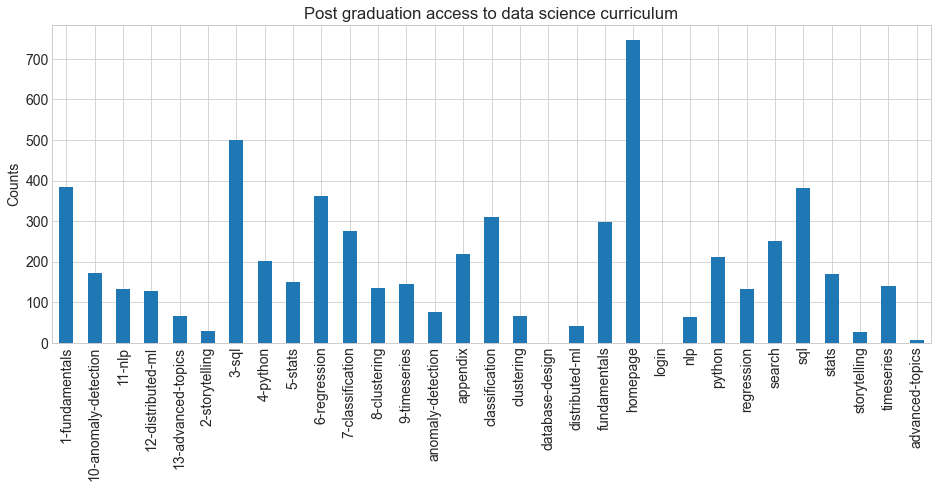

In [162]:
# Viz the post graduation hits

ds_post_hits.hits_post_grad.plot(kind='bar')
plt.title('Post graduation access to data science curriculum')
plt.tight_layout()
plt.ylabel('Counts')
plt.show()

**Takeaways**
- The top 3 topics the data science grads continuing to reference after graduation are:
    - sql
    - fundamentals
    - regression
- The barplot need to be further cleanred to remove the duplicates. 

### Web Development Program
- I will focus on the 3 most recent graduated cohorts: Ganymede, Apex, Fortuna

In [163]:
# Take a look at the log_ds
log_wd.head(1)

,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson
timestamp,,,,,,,,
2018-01-26 09:55:03,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,homepage


In [164]:
# Create a list of cohort names for ds program
wd_corhorts = ['Ganymede', 'Apex', 'Fortuna']


# Create the empty dataframe
wd_post_hits = pd.DataFrame()

for i in wd_corhorts:
    
    # Create a mask for the cohort
    mask = (log_wd.name == i)

    # Create the dataframe for that cohort
    log_cohort = log_wd[mask]

    # Create the dataframe for post graduation
    log_post_grad = log_cohort.loc[log_cohort.index > log_cohort.end_date]

    # Group by lesson and count the hists
    post_lesson = log_post_grad.groupby('lesson').size().sort_index()
    
    # Conver to dataframe
    post_lesson = pd.DataFrame(post_lesson, columns=[i])
    
    # Concat to the empty dataframe
    wd_post_hits = pd.concat([wd_post_hits, post_lesson], axis=1)

# Fill the null with 0
wd_post_hits = wd_post_hits.fillna(0)

# Take peek at the dataframe
wd_post_hits.head()

,Ganymede,Apex,Fortuna
appendix,403.0,160.0,274.0
capstone,112.0,44.0,28.0
examples,2.0,7.0,30.0
homepage,190.0,151.0,227.0
html-css,170.0,162.0,272.0


In [165]:
# Create a new column of hits_post_grad
wd_post_hits['post_grad'] = wd_post_hits.sum(axis=1)

# Take a look at the new df
wd_post_hits.head()

,Ganymede,Apex,Fortuna,post_grad
appendix,403.0,160.0,274.0,837.0
capstone,112.0,44.0,28.0,184.0
examples,2.0,7.0,30.0,39.0
homepage,190.0,151.0,227.0,568.0
html-css,170.0,162.0,272.0,604.0


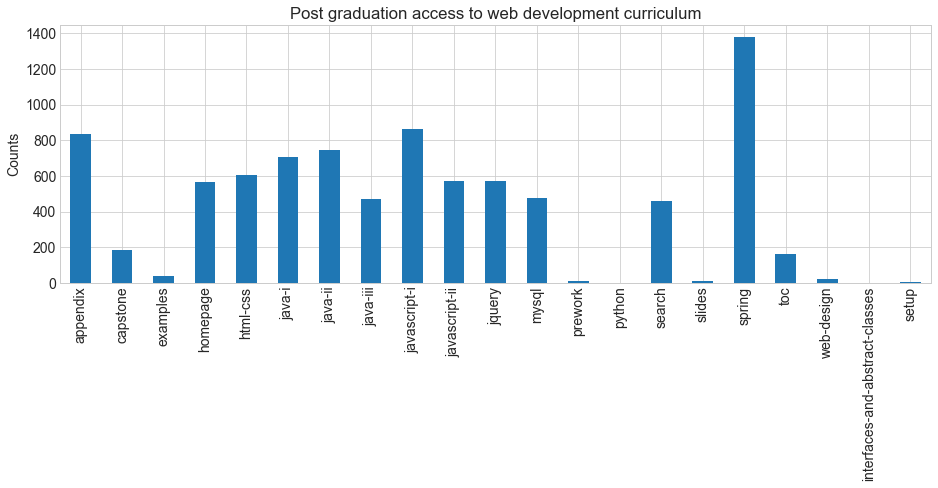

In [166]:
# Viz the post graduation hits

wd_post_hits.post_grad.plot(kind='bar')
plt.title('Post graduation access to web development curriculum')
plt.tight_layout()
plt.ylabel('Counts')
plt.show()

**Takeaways**
- The top 3 topics the web development grads continuing to reference after graduation are:
    - spring
    - appendix
    - javascript-i

### Q7: Which lessons are least accessed? 

### Data Science Program

In [167]:
# Compute the count of each lesson in ds program
ds_lessons_counts = log_ds.groupby('lesson').user_id.count()

# Convert to pandas df
ds_lessons_counts = pd.DataFrame(ds_lessons_counts).reset_index()

# Take a quick peek
ds_lessons_counts # Need cleaning to remove the lesson details

,lesson,user_id
0,%20https:,1
1,",%20https:",1
2,1-fundamentals,7577
3,1-overview,2
4,1.2-data-science-pipeline,5
...,...,...
108,stats-assessment,1
109,storytelling,792
110,timeseries,770
111,toc,9


In [168]:
# Create the empty list
ds_least_lessons = []


# Use a For Loop to remove the details:
# If the value under column lesson doesn't start with a number, it get removed

for i in range(113):
    if ds_lessons_counts.iloc[i, 0][0].isdigit():
        d = {'lesson': ds_lessons_counts.iloc[i, 0], 
             'counts': ds_lessons_counts.iloc[i, 1]}
        ds_least_lessons.append(d)
        
    else:
        continue
        
# Conver the list of dicts to datafrem and sort by 'counts'

ds_least_lessons = pd.DataFrame(ds_least_lessons).sort_values(by='counts', ascending=False)
ds_least_lessons.head()

,lesson,counts
0,1-fundamentals,7577
16,3-sql,6156
20,4-python,4828
25,6-regression,4544
24,5-stats,3354


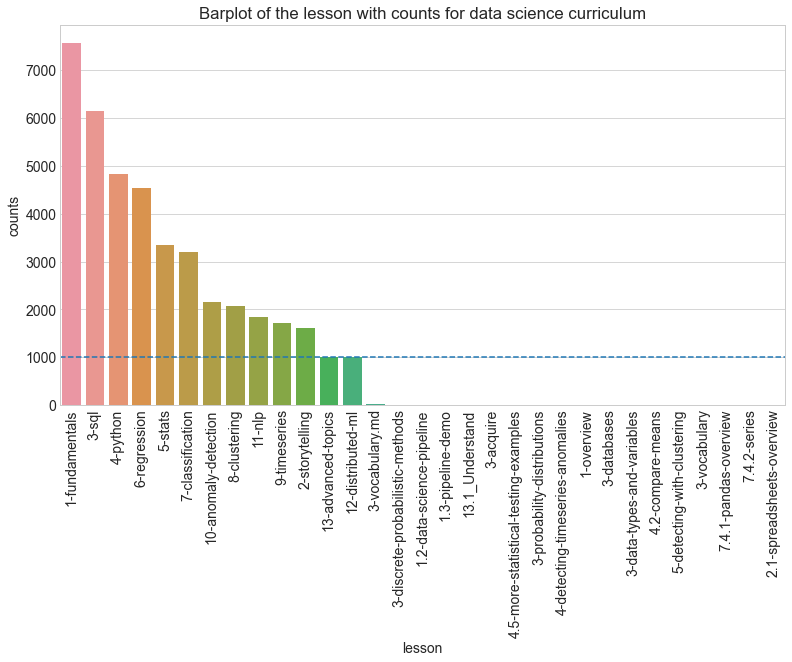

In [169]:
# Visualize the lesson counts for data science program

sns.barplot(data=ds_least_lessons, x='lesson', y='counts')
plt.title('Barplot of the lesson with counts for data science curriculum')
plt.xticks(rotation='vertical')
plt.axhline(y = 1000, linestyle='dashed')
plt.show()

**Takeaways**
- For data science curriculum, the least accessed lessons are overviews and vocabulary. 

### Web Development

In [170]:
# Compute the count of each lesson in ds program
wd_lessons_counts = log_wd.groupby('lesson').user_id.count()

# Convert to pandas df
wd_lessons_counts = pd.DataFrame(wd_lessons_counts).reset_index()

# Take a quick peek
wd_lessons_counts # Need cleaning to remove the lesson details

,lesson,user_id
0,.git,1
1,.gitignore,1
2,.well-known,2
3,00_,9
4,00_index,29
...,...,...
643,web-design,1788
644,web-dev-day-two,2
645,working-with-time-series-data,1
646,wp-admin,1


In [171]:
# Create the empty list
wd_least_lessons = []


# Use a For Loop to remove the details:
# If the value under column lesson doesn't start with a number, it get removed

for i in range(113):
    if wd_lessons_counts.iloc[i, 0][0].isdigit():
        d = {'lesson': wd_lessons_counts.iloc[i, 0], 
             'counts': wd_lessons_counts.iloc[i, 1]}
        wd_least_lessons.append(d)
        
    else:
        continue
        
# Conver the list of dicts to datafrem and sort by 'counts'

wd_least_lessons = pd.DataFrame(wd_least_lessons).sort_values(by='counts', ascending=False)

# Print the shape
print(wd_least_lessons.shape)

# Take a peek at the df
wd_least_lessons.head()

(110, 2)


,lesson,counts
10,1-fundamentals,2210
13,10-anomaly-detection,1426
48,11-nlp,469
12,1._Fundamentals,425
84,12-distributed-ml,318


**Takeaways**
- After cleaning, there are still 110 lessons and I can't visualize all of them in one plot (Tablue will be a better option).
- So I decide to set a threshold: I will visaulize the bottom 20%.

In [172]:
# Compute the cutoff for bottom 20%

cutoff = wd_least_lessons.counts.quantile(0.2)
cutoff

4.800000000000001

**Takeaways**
- I will round the cutoff to 5 and visualize the lessons with less than 5 hits. 

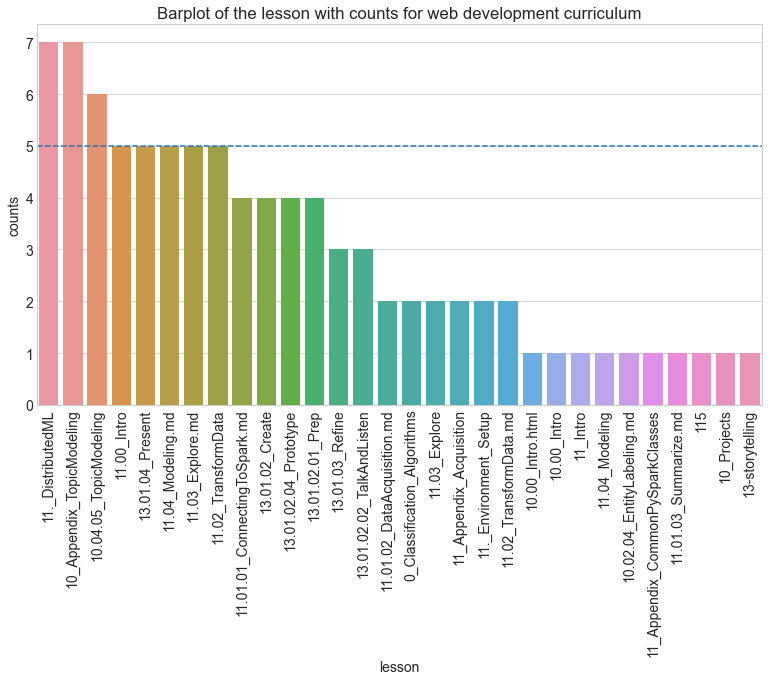

In [173]:
# Visualize the lesson counts for data science program

sns.barplot(data=wd_least_lessons.tail(30), x='lesson', y='counts')
plt.title('Barplot of the lesson with counts for web development curriculum')
plt.xticks(rotation='vertical')
plt.axhline(y = 5, linestyle='dashed')
plt.show()

**Takeaways**
- For web development curriculumn, many of the least asseessed lessons are introductions and .md files.

**Conclusion**
- Q1 to Q7 are all successfully addressed in this explore_log notebook.